In [ ]:
#default_exp example_graphs

In [ ]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Example directed graphs

> Various functions to generate examples of directed graphs (DAGs),
> mainly graphs from various [related works](02_related.ipynb)

In [ ]:
#hide
from nbdev.showdoc import *

In [ ]:
#export
import networkx as nx
import matplotlib.pyplot as plt


## Create crown DAG known as $S_3^0$ graph

![Crown DAG also known as $S_0^3$ graph](images/feline/FELINE_paper-fig_4-crown_DAG-graph_only.png)

Generate crown DAG (Directed Acyclic Graph), also known as $S_3^0$ graph.

This graph is taken from FELINE paper (2014), where it is used to show _falsely-implied path_ or _false-positive_ of the FELINE index.

This graph is shown in Figure 4 of the FELINE paper.

In [ ]:
#export
def crown_DAG():
    """Returns crown DAG known as S_3^0 graph
    
    Returns
    -------
    graph : networkx.DiGraph
        Crown DAG also known as S_3^0 directed graph
    """
    DG=nx.DiGraph()
    DG.add_nodes_from([1,2,3,4,'u','v'])
    DG.add_edges_from([(1,2),(3,4),(1,'v'),(3,'v'),('u',2),('u',4)])
    return DG


### Draw the crown DAG (`crown_DAG()`)

Draw the 6-nodes crown DAG, known as $S_3^0$ graph, using \[automatic\] shell layout:

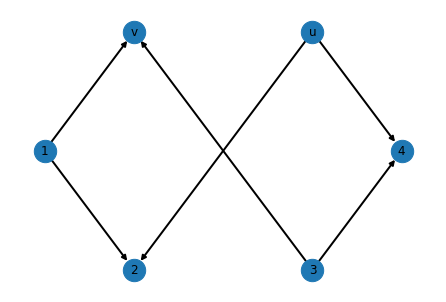

In [ ]:
#@title Draw the $S_3^0$ graph using [automatic] shell layout
DG=crown_DAG()
nx.draw_shell(DG,with_labels=True,node_size=500,width=2.0)

Drawing the crown DAG with circular layout results in the same plot as with shell layout, shown above.

Draw the 6-nodes crown DAG, known as $S_3^0$ graph, using the default spring layout positioning:

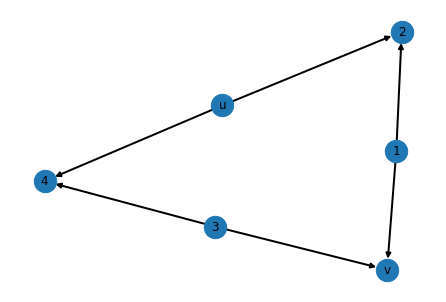

In [ ]:
DG=crown_DAG()
nx.draw(DG,with_labels=True,node_size=500,width=2.0)

In [ ]:
#DG=crown_DAG()
#nx.draw_kamada_kawai(DG,with_labels=True,node_size=500,width=2.0)

Draw the 6-nodes crown DAG, known as the $S_3^0$ graph, using automatic bipartite layout.

This is a similar layout to the one used in left side of Figure 4 in the FELINE paper, just with changed order of nodes in each of sets of vertices (each partition).

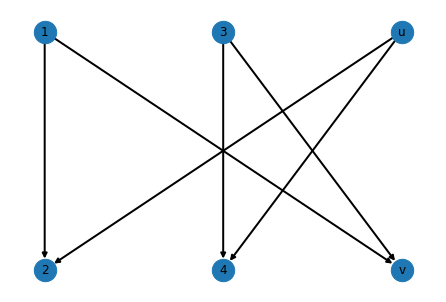

In [ ]:
DG=crown_DAG()
nx.draw(DG,pos=nx.bipartite_layout(DG,[1,'u',3],align='horizontal'),
        with_labels=True,node_size=500,width=2.0)

Draw the crown DAG known as $S_3^0$ graph using weak dominance drawing.

This is the same layout as the one used on right size of Figure 4 in the FELINE paper. It shows example of exception between nodes $u$ and $v$. The <span color="orange">orange</span> arrow is a _falsely implied path_ or a _false-positive_ for the FELINE index.

It is important to notice that some graphs, such as $S_3^0$,
do not admit a 2D index which is free of false-positives.
The weak dominance drawing shown below has the smallest possible number of false-positives for this graph.

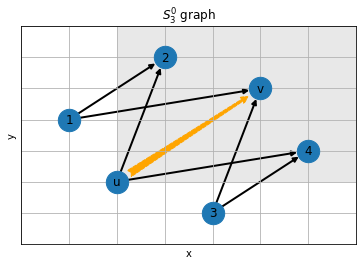

In [ ]:
#@title Draw the $S_3^0$ graph using weak dominance drawing
from matplotlib.patches import Rectangle, FancyArrowPatch

ax=plt.gca()
ax.add_patch(Rectangle((2,2), 5, 5, facecolor="lightgrey",alpha=0.5))
ax.add_patch(
    FancyArrowPatch((2,2),(5,5),
                    shrinkA=15,shrinkB=15,
                    arrowstyle='fancy',mutation_scale=18,
                    linestyle='dashed',hatch='\\',color='orange')
)

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('$S_3^0$ graph')
plt.xlim(xmin=0,xmax=7)
plt.ylim(ymin=0,ymax=7)

DG=crown_DAG()
DG.pos={1:(1,4),2:(3,6),'u':(2,2),3:(4,1),4:(6,3),'v':(5,5)}
nx.draw_networkx(DG,pos=DG.pos,
                 node_size=500,width=2.0,label='$S_3^0$ graph')

## Create the small DAG (example in Figure 2 in FELINE paper)

![An example of a small DAG](images/feline/FELINE_paper-fig_2a-small_DAG-graph_only.png)

An example of a small DAG from FELINE paper, used in various places

In [ ]:
#export
def small_DAG_FELINE():
    """Create small DAG (example in Figure 2 in FELINE paper)
        
    Returns
    -------
    graph : networkx.DiGraph
        Small DAG (example in Figure 2 in FELINE paper)
    """
    sd=nx.DiGraph()
    sd.add_nodes_from([chr(c) for c in range(ord('a'),ord('h')+1)])
    sd.add_edges_from([('a','c'),('a','d'),('a','e'),('b','f'),('b','g'),('c','h'),('e','h'),('f','h')])
    return sd


### Draw a small DAG example (`small_DAG_FELINE()`)

Draw using default spring layout (somewhat random)

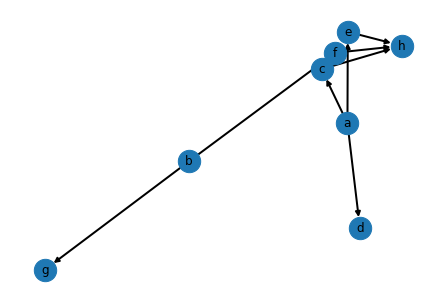

In [ ]:
sd=small_DAG_FELINE()
nx.draw(sd,with_labels=True,node_size=500,width=2.0)

Draw using node positions created with the help of `pydot` module and Graphviz.

We use 'dot' layout algorithm, which creates “hierarchical” or layered drawings of directed graphs. This is the default tool in Graphviz to use if edges have directionality (like in this case).

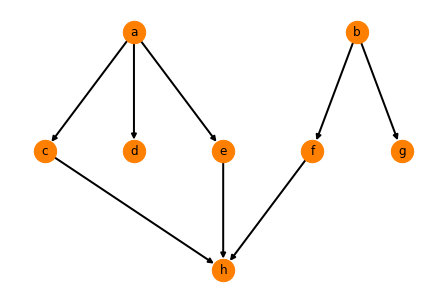

In [ ]:
try:
    import pydot
    
    sd=small_DAG_FELINE()
    pos=nx.drawing.nx_pydot.pydot_layout(sd, prog='dot')
    nx.draw(sd, pos=pos, with_labels=True,
            node_size=500,width=2.0,node_color='#FF7F00')
except ModuleNotFoundError:
    print("'pydot' module not installed")

Draw a small DAG as shown in Figure 2 in the FELINE paper (levels-based, if we use levels starting from sources)

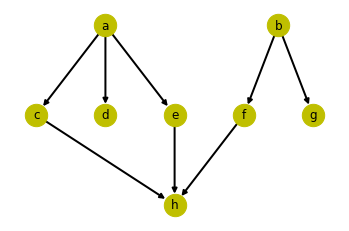

In [ ]:
#@title Draw a small DAG, as in Figure 2 (source levels-based)
limits = plt.axis('off')
sd=small_DAG_FELINE()
nx.draw_networkx(sd,
                 pos={'a':(2,3),'b':(4.5,3),'c':(1,2),'d':(2,2),'e':(3,2),'f':(4,2),'g':(5,2),'h':(3,1)},
                 node_size=500,width=2.0,node_color='y')

Draw a small DAG from FELINE paper using weak dominance drawing

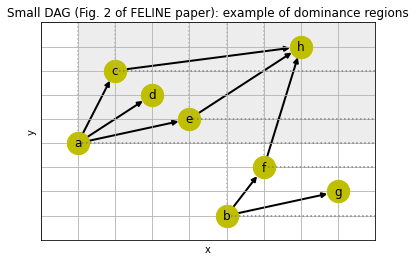

In [ ]:
#@title Draw small DAG using weak dominance drawing
from matplotlib.patches import Rectangle

sd=small_DAG_FELINE()
sd.xy=dict(zip([chr(c) for c in range(ord('a'),ord('h')+1)],
               zip([1,5,2,3,4,6,8,7],[4,1,7,6,5,3,2,8])))

ax=plt.gca()
ax.add_patch(Rectangle(sd.xy['a'], 8, 5, facecolor="lightgrey",alpha=0.4))

for node in sd.nodes:
  if sd.out_degree(node) == 0:
    continue
  (vx,vy)=sd.xy[node]
  #print(node,vx,vy)
  plt.axhline(xmin=vx/9.0,y=vy,color='0.5', ls=':')
  plt.axvline(x=vx,ymin=vy/9.0,color='0.7', ls=':')

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Small DAG (Fig. 2 of FELINE paper): example of dominance regions')
plt.xlim(xmin=0,xmax=9)
plt.ylim(ymin=0,ymax=9)

nx.draw_networkx(sd,pos=sd.xy,
                 node_size=500,width=2.0,node_color='y')

The above figure shows example of dominance regions for the drawing of a small DAG (Figure 3 of FELINE paper).

## Create a didactic example of a DAG (a tree)

![A didactic example of a DAG](images/feline/FELINE_paper-fig_6-didactic_example_of_a_DAG-graph_only.png)

Creates a tree DAG, used as a didactic example in the FELINE paper, where it is shown in Figure 6

In [ ]:
#export
def tree_DAG():
    """Create tree DAG ('didactic example' in Figure 6 in FELINE paper)
    
    The created tree graph has a single source node with out-degree of 3,
    its 3 out-neighbours have out-degrees, respectively, of 2, 1 and 2.
    Out-neighbours of those nodes are sink nodes with out-degree of 0.
    The tree has maximum level of 3.
    
    Below there is ASCII-art rendering of this graph; edges point downward
    
                                'a' 
                              __/|\__
                             /   |   \
                           'b'  'c'  'd'
                           / \   |   / \
                          /  |   |   |  \
                        'e' 'f' 'g' 'h' 'i'
    
    Returns
    -------
    graph : networkx.DiGraph
        Tree DAG (example in Figure 6 in FELINE paper)
    """
    de=nx.DiGraph()
    de.add_nodes_from([chr(c) for c in range(ord('a'),ord('i')+1)])
    de.add_edges_from([('a','b'),('a','c'),('a','d'),
                       ('b','e'),('b','f'),
                       ('c','g'),
                       ('d','h'),('d','i')])
    return de

### Draw a tree DAG (didactic example from Figure 6 in FELINE paper) - `tree_DAG()`

Draw using node positions created with the help of `pydot` module and Graphviz, if it is present (installed).

We use 'dot' layout algorithm, which creates “hierarchical” or layered drawings of directed graphs. This is the default tool in Graphviz to use if edges have directionality (like in this case).

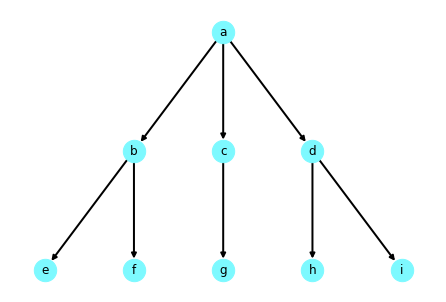

In [ ]:
try:
    import pydot
    
    de=tree_DAG()
    pos=nx.drawing.nx_pydot.pydot_layout(de, prog='dot')
    nx.draw(de, pos=pos, with_labels=True,
            node_size=500,width=2.0,node_color='#7DF9FF')
except ModuleNotFoundError:
    print("'pydot' module not installed")

Draw a didactic example of a DAG, as in Figure 6 (levels-based) of FELINE paper

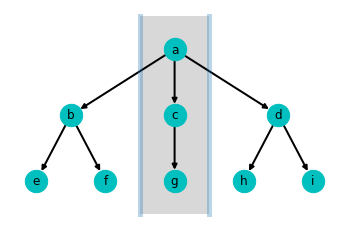

In [ ]:
#@title Draw a didactic example of a DAG, as in Figure 6 (levels-based)
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

de=tree_DAG()

plt.axis('off')
de.tree={
  'a':(3,3),
  'b':(1.5,2),'c':(3,2),'d':(4.5,2),
  'e':(1,1),'f':(2,1),'g':(3,1),'h':(4,1),'i':(5,1)
}

ax=plt.gca()
ax.add_patch(Rectangle((2.5,0.5), 1, 3, facecolor="grey",alpha=0.3))
ax.add_line(Line2D([2.5,2.5], [0.5,3.5],lw=5., alpha=0.3))
ax.add_line(Line2D([3.5,3.5], [0.5,3.5],lw=5., alpha=0.3))

nx.draw_networkx(de,
                 pos=de.tree,
                 node_size=500,width=2.0,node_color='c')

This figure shows a didactic example of a DAG and its two topological orderings obtained by Algorithm 1 in FELINE-index paper.

Given a query $r(a,g)$, all vertices after $g$ in first and second table are discarded (on the left and on the right of $g$). This strategy reduces the search space to only vertices $a$, $c$ and $g$.

Draw a didactic example of a DAG (tree DAG) using weak dominance drawing

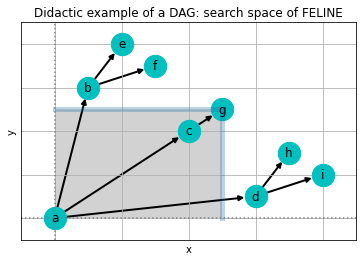

In [ ]:
#@title Draw a didactic example of a DAG using weak dominance drawing
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D

de=tree_DAG()
o1=list('abefcgdhi')
o2=list('adihcgbfe')
de.pos={v: (x,0) for (x,v) in enumerate(o1)}
for (y,v) in enumerate(o2):
  de.pos[v]=(de.pos[v][0],y)

ax=plt.gca()
ax.add_patch(Rectangle(de.pos['a'],
                       de.pos['g'][0] - de.pos['a'][0],
                       de.pos['g'][1] - de.pos['a'][1],
                       facecolor="grey",alpha=0.35))
ax.add_line(Line2D([de.pos['g'][0],de.pos['g'][0]],
                   [de.pos['g'][1],de.pos['a'][1]],
                   lw=5., alpha=0.3))
ax.add_line(Line2D([de.pos['g'][0],de.pos['a'][0]],
                   [de.pos['g'][1],de.pos['g'][1]],
                   lw=5., alpha=0.3))

  
plt.axvline(x=de.pos['a'][1],color='0.5', ls=':')
plt.axhline(y=de.pos['a'][0],color='0.5', ls=':')

plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Didactic example of a DAG: search space of FELINE')
plt.xlim(xmin=-1,xmax=9)
plt.ylim(ymin=-1,ymax=9)

nx.draw_networkx(de,pos=de.pos,
                 node_size=500,width=2.0,node_color='c')

**NOTE**: we are skipping figure titled 'Didactic example of a DAG: search space of FERRARI\n(topological ordering x)' in [Reachability labels for version control graphs.ipynb](_Reachability_labels_for_version_control_graphs.ipynb). If it is to be added, it would be added in the notebook describing various reachability indices.

## Create example RCH graph (from PReaCH paper)

Create an example DAG used among others for showing how Reachability Contraction Hierarchies (RCH) labeling works. This graph is shown on Figures 1 and 2 in the PReaCH paper.

The graph as shown in Figure 1 in the PReaCH paper (preprint) can be seen below:

![Example RCH graph](images/preach/PReaCH_arXiv-fig_1-example_RCH-zoom.png)

_Caption:_ Example RCH. Edges in the forward search space are light green, and those in the
backward search space are dark blue. The search spaces for a query from $s$ to $t$ are circled.
Node labels specify the RCH node ordering.

In [ ]:
#export
def RCH_graph():
    """Create RCH example graph (example in Figure 1 and 2 in PReaCH paper)
    
    Positions of nodes in the drawing from Figure 1 and 2 in PReaCH paper
    is stored in `pos` attribute of returned graph object.
    
    Backward topological levels (i.e. with level equal to 0 for nodes
    with no outgoing edges, that is with out-degree of 0) are stored
    in `lvl` attribute of returned graph object.
    
    Returns
    -------
    graph : networkx.DiGraph
        RCH example DAG (example in Figures 1 and 2 in PReaCH paper)
    """
    ch=nx.DiGraph()
    ch.add_edges_from([('a','e'),
                       ('b','e'),('b','f'),('b','g'),
                       ('c','h'),('c','i'),
                       ('d','i'),

                       ('e','j'),
                       ('f','o'),('f','k'),
                       ('g','l'),
                       ('h','l'),
                       ('i','m'),('i','n'),

                       ('j','o'),('j','p'),
                       ('k','p'),
                       ('l','q'),
                       ('m','q'),
                      ])
    
    # backward topological levels (max path length to sink node)
    ch.lvl={
        'o':0,'p':0,'q':0,'n':0,
        'j':1,'k':1,'l':1,'m':1,'i':1,
        'e':2,'f':2,'g':2,'h':2,'d':2,
        'a':3,'b':3,'c':3,
    }
    # position of node in drawing of a graph in Figures 1 and 2 in the PReCH paper
    ch.pos={
        'a':(0,0),'b':(1,0),          'c':(3,0),'d':(4,0),
        'e':(0,1),'f':(1,1),'g':(2,1),'h':(3,1),'i':(4,1),
        'j':(0,2),'k':(1,2),'l':(2,2),'m':(3,2),'n':(4,2),
        'o':(0,3),'p':(1,3),          'q':(3,3),          
    }
    return ch


### Draw RCH graph (from Figures 1 and 2 in the PReaCH paper) - `RCH_graph()`

Draw using node positions created with the help of `pydot` module and Graphviz, if it is present (installed).

We use 'dot' layout algorithm, which creates “hierarchical” or layered drawings of directed graphs. This is the default tool in Graphviz to use if edges have directionality (like in this case).

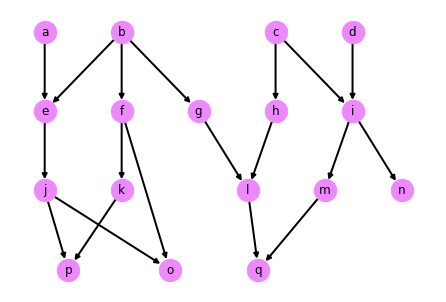

In [ ]:
try:
    import pydot
    
    ch=RCH_graph()
    pos=nx.drawing.nx_pydot.pydot_layout(ch, prog='dot')
    nx.draw(ch, pos=pos, with_labels=True,
            node_size=500,width=2.0,node_color='#ee88ff')
except ModuleNotFoundError:
    print("'pydot' module not installed")

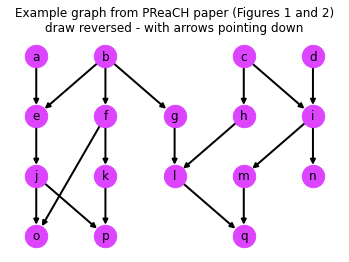

In [ ]:
ch=RCH_graph()

plt.axis("off")
plt.title('Example graph from PReaCH paper (Figures 1 and 2)\ndraw reversed - with arrows pointing down')
nx.draw_networkx(ch,pos={key:(value[0],-value[1]) for (key,value) in ch.pos.items()},
                 node_size=500,width=2.0,node_color='#dd44ff')
plt.show()

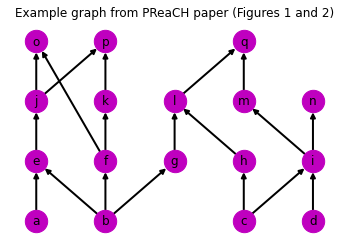

In [ ]:
ch=RCH_graph()

plt.axis("off")
plt.title('Example graph from PReaCH paper (Figures 1 and 2)')
nx.draw_networkx(ch,pos=ch.pos,
                 node_size=500,width=2.0,node_color='m')
plt.show()

## Create example commit graph (from Stolee blog posts)

An example commit graph from the series of blog posts "_Supercharging the Git Commit Graph_" by Derrick Stolee.

In the drawing of this graph below arrows (directed edges) point from right to left.

![An example Git commit graph](images/stolee.dev/commit-graph-example.png)

In [ ]:
#export
def commit_graph():
    """Create an example of Git commit graph
    
    This graph is taken from Derrick Stolee series of blog posts
    "Supercharging the Git Commit Graph".
    
    Positions of nodes in the drawing from `commit-graph-example.png`
    is stored in `pos` attribute of returned graph object.
    
    Returns
    -------
    graph : networkx.DiGraph
        An example Git commit graph (from Stolee blog post)
    """
    cg=nx.DiGraph()
    cg.add_edges_from([('A','a7'),('a7','a5'),            ('a5','a4'),('a4','a3'),('a3','a2'),('a2','a1'),('a1','b0'),
                       ('B','b7'),('b7','b6'),('b6','b5'),('b5','b4'),('b4','b3'),('b3','b2'),('b2','b1'),('b1','b0'),
                       ('B','c7'),('c7','c6'),('c6','c5'),('c5','c4'),('c4','c3'),('c3','c1'),            ('c1','b0'),
                       # short-lived branch
                       ('c6','d5'),('d5','c4'),
                       # cross-connections (merges)
                       ('a7','c6'),
                       ('b6','a5'),('a5','b4'),('b4','a3'),
                       ('b5','c4'),
                       ('c3','b2'),('b2','a1'),
                      ])
    
    cg.pos={'b0':(0,1),'b1':(1,1),'b2':(2,1),'b3':(3,1),'b4':(4,1),'b5':(5,1),'b6':(6,1),'b7':(7,1),'B':(8,1),
                       'a1':(1,0),'a2':(2,0),'a3':(3,0),'a4':(4,0),'a5':(5,0),           'a7':(7,0),'A':(8,0),
                       'c1':(1,2),           'c3':(3,2),'c4':(4,2),'c5':(5,2),'c6':(6,2),'c7':(7,2),
                                                                   'd5':(5,3),
           }
    
    return cg


### Draw an example commit graph (`commit_graph()`)

Draw using node positions created with the help of `pydot` module and Graphviz, using 'dot' layout algorithm, if the module is present (installed).

The resulting positioning is transformed from vertical to horizontal, and flipped along horizontal axis to better match the original drawing in the Stolee blog post(s).

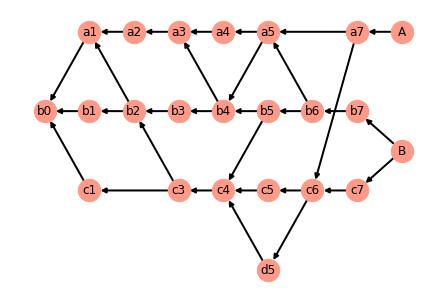

In [ ]:
try:
    import pydot
    
    cg=commit_graph()
    pos=nx.drawing.nx_pydot.pydot_layout(cg, prog='dot')
    nx.draw(cg, pos={n:(y,-x) for (n,(x,y)) in pos.items()}, with_labels=True,
           node_size=500,width=2.0,node_color='#ff9988')
except ModuleNotFoundError:
    print("'pydot' module not installed")

Plot just like it was done in Derrick Stolee blog post (but with arrows on directed edges).

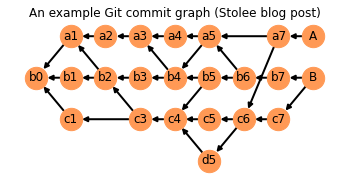

In [ ]:
cg=commit_graph()

plt.axis("off")
plt.gca().set_aspect(1.2)
plt.title('An example Git commit graph (Stolee blog post)')
nx.draw_networkx(cg,pos={n:(x,-y) for (n,(x,y)) in cg.pos.items()},
                 node_size=500,width=2.0,node_color='#ff9955')
plt.show()

## References

There is no single way of handling references and citations (bibliography) in Jupyter Notebook.

Some of the various solutions are presented below:
- [nbconvert examples :: Managing citations in the IPython Notebook](https://nbviewer.jupyter.org/github/ipython/nbconvert-examples/blob/master/citations/Tutorial.ipynb)
- [Writing academic papers in plain text with Markdown and Jupyter notebook](https://sylvaindeville.net/2015/07/17/writing-academic-papers-in-plain-text-with-markdown-and-jupyter-notebook/) by Sylvain Deville (2015)
- use the Document Tools of the [Calico suite](http://calicoproject.org/): [Calico Document Tools and BibTeX](https://jupyter.brynmawr.edu/services/public/dblank/jupyter.cs/Examples/Calico%20Document%20Tools%20and%20Bibtex.ipynb)
- [cite2c](https://github.com/takluyver/cite2c) extension for live citations in IPython notebooks, which uses [Zotero](https://zotero.org) as citations database, and rendering both bibliographies and inline citations in Markdown cells with the help of [citeproc-js](https://bitbucket.org/fbennett/citeproc-js/wiki/Home)
- use [jupyter_latex_envs](https://github.com/jfbercher/jupyter_latex_envs) Jupyter extension to [generate Reference section](https://rawgit.com/jfbercher/jupyter_latex_envs/master/src/latex_envs/static/doc/latex_env_doc.html#Bibliography); note, that `nbdev` now only supports converting of BibTeX citations by the way of `\cite{}` to `<a class="latex_cit" id="call-" href="#cit-"></a>` [via `cite2link()`](https://nbdev.fast.ai/export2html.html#Converting-bibtex-citations)

Therefore, for the time being, live / hyperlinked citations and automatically generated bibliography won't be used.

The bibliography is currently generated by hand, and work are referred to by their nicknames, e.g. "_the FELINE paper_".

- **\[FELINE\]**
  Renê R. Veloso, Loïc Cerf, Wagner Meira Jr, Mohammed J. Zaki:
  "_Reachability Queries in Very Large Graphs: A Fast Refined Online Search Approach_",
  Proc. 17th International Conference on Extending Database Technology (EDBT),
  March 24-28, 2014, Athens, Greece: ISBN 978-3-89318065-3,  
  <http://openprocedings.org/EDBT/2014/paper_166.pdf>  
  <https://dx.doi.org/10.5441/002/edbt.2014.46>
  
- **\[PReaCH\]**
  Florian Merz, Peter Sanders:
  "_PReaCH: A Fast Lightweight Reachability Index using Pruning and Contraction Hierarchies_",
  arXiv:1404.4465v1 \[cs.DS\],
  17 Apr 2014,  
  <https://arxiv.org/abs/1404.4465>
  
- **\[Stolee\]**
  Derrick Stolee:
  "_Supercharging the Git Commit Graph II: File Format_",
  July 2nd, 2018,  
  <https://devblogs.microsoft.com/devops/supercharging-the-git-commit-graph-ii-file-format/>

----------

In [ ]:
#hide
# this should be the last cell of the notebook
from nbdev.export import notebook2script
notebook2script()

Converted 01_tools.ipynb.
Converted 02_related.ipynb.
Converted 03_example_graphs.ipynb.
Converted index.ipynb.
